### DATA ANALYSIS: Correlation between ETA of b1, b2 and Genphoton

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL as p
import seaborn as sns
sns.set_style("whitegrid")

In [61]:
print(f'Working Directory: {os.getcwd()}')

Working Directory: /teamspace/studios/this_studio


In [62]:
signal_dir = 'Data Preprocessing/data/signal.txt'
background_dir = 'Data Preprocessing/data/background.txt'

signal = pd.read_csv(signal_dir, sep = '\t')
background = pd.read_csv(background_dir, sep = '\t')

In [63]:
# signal.columns

In [64]:
columns = ['b1_Eta', 'b2_Eta', 'genphoton_Eta']
signal = signal[columns]
background = background[columns]

In [65]:
print(signal.shape, background.shape) 

(930, 3) (2560, 3)


In [66]:
signal.head()

,b1_Eta,b2_Eta,genphoton_Eta
0,-2.27381,-2.079700,-1.970920
1,-1.27113,-1.426930,-0.991691
2,-1.13163,-0.881098,-0.430594
3,1.78666,1.253610,2.001840
4,-2.31791,-1.825020,-0.915270


#### SIGNAL - ORIGINAL DATA

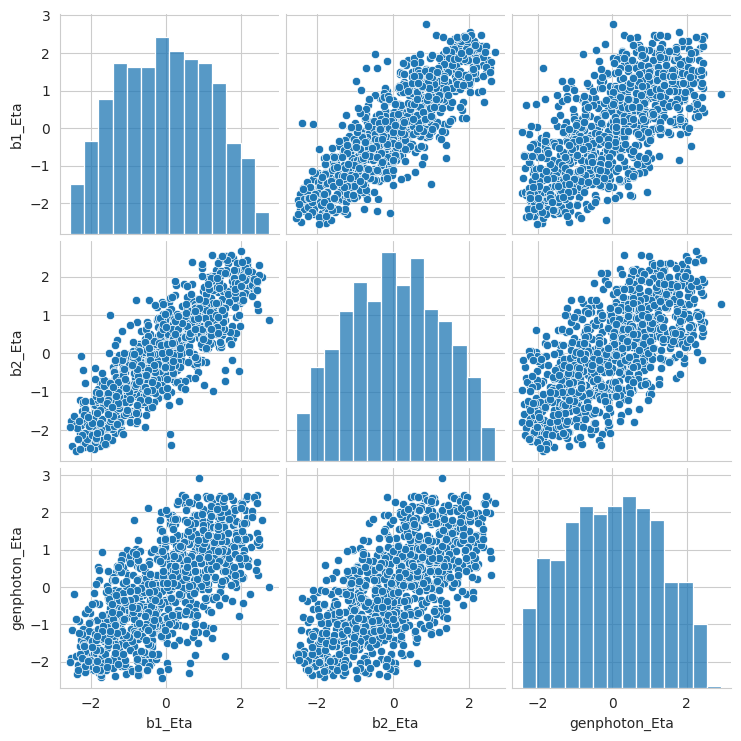

In [67]:
sns.pairplot(data=signal) 

<Axes: >

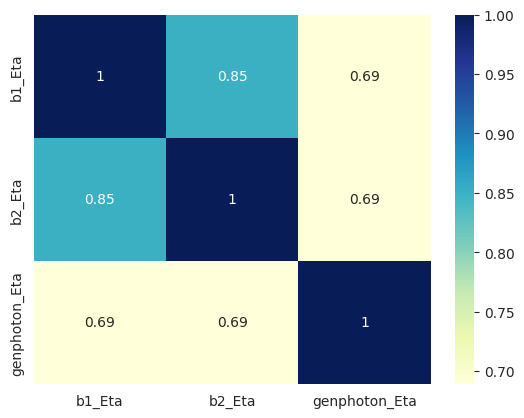

In [68]:
# CORRELATION MATRIX 
sns.heatmap(signal.corr(), annot = True, cmap="YlGnBu")

#### BACKGROUND ORIGINAL DATA

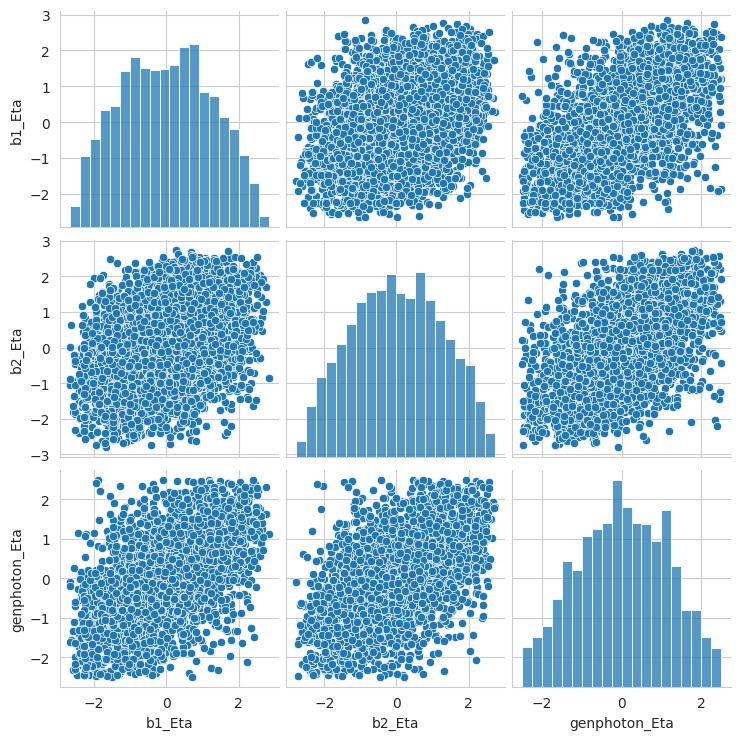

In [69]:
sns.pairplot(data=background) 

<Axes: >

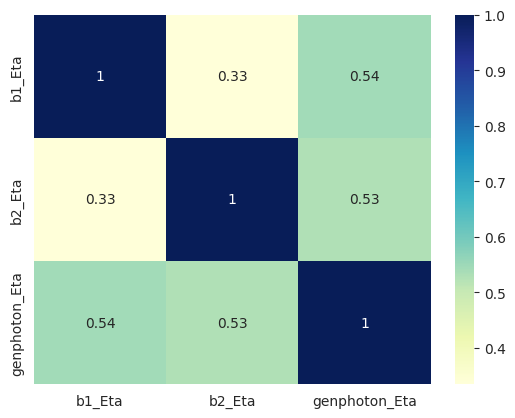

In [70]:
sns.heatmap(background.corr(), annot = True, cmap="YlGnBu")

### DIFFERENCES BETWEEN PHI's

In [71]:
def del_phi(x1: pd.Series, x2: pd.Series):
    x = x1 - x2
    x_transform = x.apply(lambda x: np.abs(2*np.pi - np.abs(x)) if np.abs(x) > np.pi else np.abs(x)) 
    return x_transform

In [72]:
def dels(df:pd.DataFrame):
    df['del_b1_b2'] = del_phi(df['b1_Eta'], df['b2_Eta'])
    df['del_b1_gen'] = del_phi(df['b1_Eta'], df['genphoton_Eta'])
    df['del_b2_gen'] = del_phi(df['b2_Eta'], df['genphoton_Eta'])
    return df.iloc[:, 3:] 

In [73]:
signal_updated = dels(signal.copy())
background_updated = dels(background.copy()) 

#### FOR SIGNAL

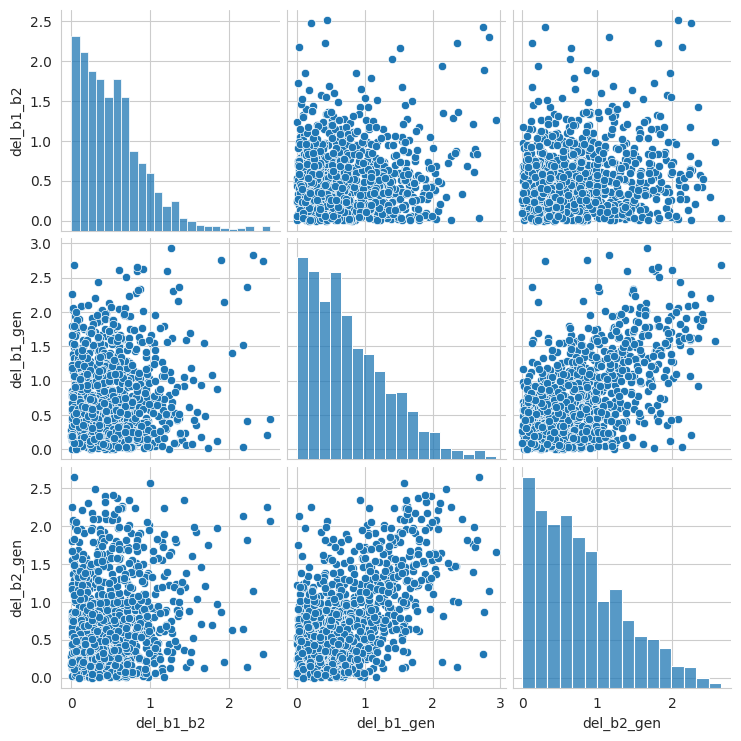

In [74]:
sns.pairplot(data=signal_updated)

<Axes: >

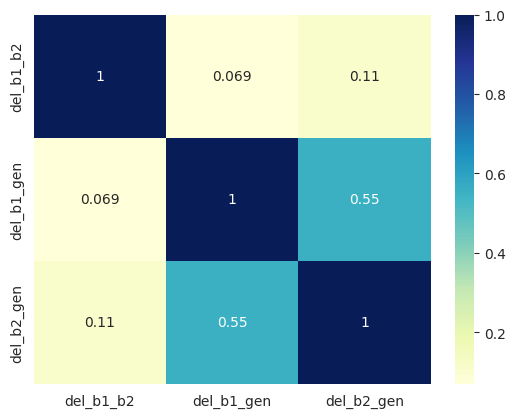

In [75]:
sns.heatmap(signal_updated.corr(), annot = True, cmap="YlGnBu") 

#### FOR BACKGROUND

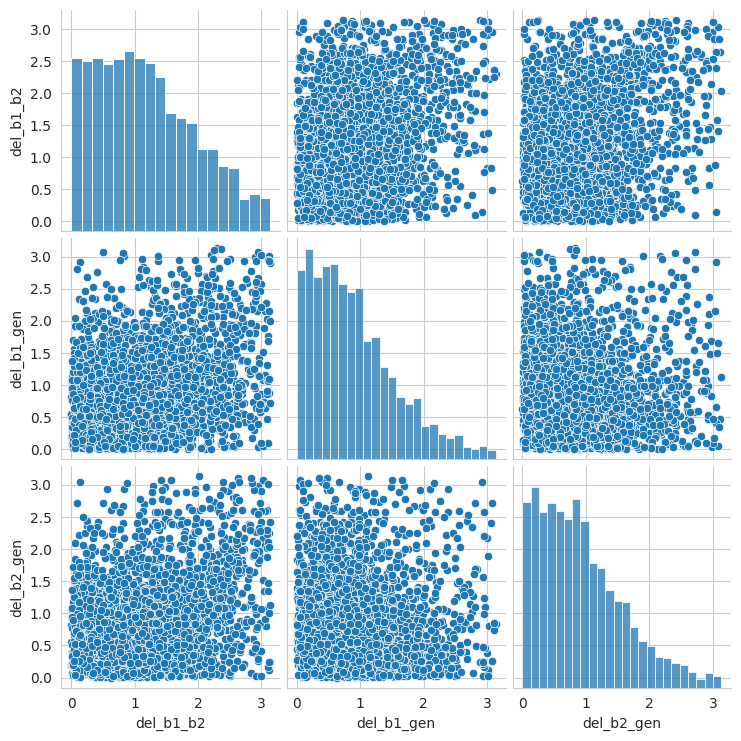

In [76]:
sns.pairplot(data=background_updated) 

<Axes: >

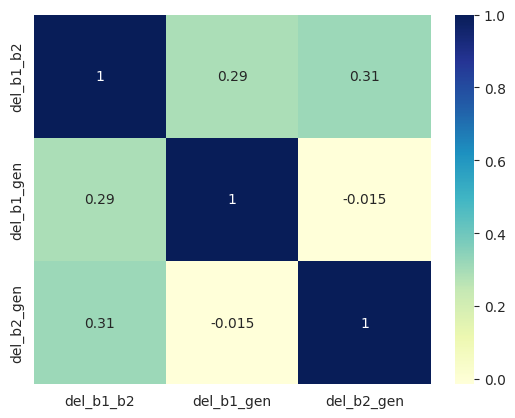

In [77]:
sns.heatmap(background_updated.corr(), annot=True, cmap='YlGnBu')